# Classical Methods

## Overview
**Questions**
- What is a classical potential?
- How would I model a van der Waals interaction?

**Objectives**
- Introduce classical potential models
- Show examples of functions used to model non-bonded interactions

**Classical methods** is a phrase used to describe techniques that make use of a potential model (sometimes called a force-field) to simulated chemical systems. 
These can be molecular dynamics (which we will cover in this module), Monte Carlo, Langevin dynamics, etc. 

In order to simulate a **real** chemical system, it is necessary to model the electrons and their interactions. 
This is achieved by using quantum mechanical calculations, where the energy of a chemical system is calculated by finding an approximate solution to the Schrödinger equation. 
However, these calculations are **very** computationally expensive, and are therefore realistically limited to hundreds of atoms. 

The Born-Oppenheimer approximation assumes that the potential energy of a given system depends only on the positions of the nuclei. 
With this assumption envoked, it is possible to find the potential energy using two approaches. 
The first is some ground-state quantum mechanical method (e.g. density functional theory), however as mentioned above these are limited in system size. 
The alternative involves modelling the electron distributions with some mathematical function to determine the potential energy. 
These **potential models** are usually faster to calculate than the quantum mechanical method and therefore may be used on larger systems. 
However, this **simplification** does have a drawback in that the correct potential models must be determined for each system to accurately determine the energy. 

## Potential models

Potential models are a more computationally efficient way to determine the **potential energy** of a chemical system. 
In practice, a potential model consists of a series mathematical functions that depend on the position of the atoms ($\mathbf{r}$), each of which represent a different contribution to the potential energy. 
For a molecular system, this is represented as a series of bonded and non-bonded terms, 

$$ E(\mathbf{r}) = E_{\text{bond}}(\mathbf{r}) + E_{\text{non-bond}}(\mathbf{r}). $$

The total potential energy of the given system is then the sum of these potential energy calculations for each atom. 
It is common for the bonded potential energy ($$ E_{\text{bond}}(\mathbf{r}) $$) to consist of terms taking into account the contritions of bond length, bond angle, and dihedral angle. 
For example, bond lengths are often modelled with a harmonic potential energy function, 

$$ E_{\text{bond length}}(\mathbf{r}_{ij}) = K_b(\mathbf{r}_{ij} - b_0), $$

where, $b_0$ and $K_b$ are bond specific parameters which must be determined (see episode 2), and $\mathbf{r}_{ij}$ is the distance between the two bonded particles. 
An example of this function can be seen below, using the parameters of a carbon-carbon bond.

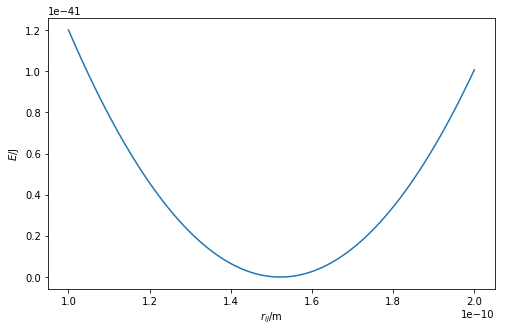

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def bonded(kb, b0, rij):
    """
    Calculation of the potential energy of a bond.
    
    Parameters
    ----------
    kb: float
        Bond force constant (units: k)
    b0: float 
        Equilibrium bond length
    rij: float
        Distance between two atoms
    
    Returns
    float
        Energy of the bonded interaction
    """
    return kb * (rij - b0) ** 2

r = np.linspace(1e-10, 2e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, bonded(4.4049e-21, 1.522e-10, r))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

For the sake of simplicity, the remainder of this episode will only focus on non-bonded interactions. 
However, it is important to be aware that all aspects mentioned are **equally applicable** to bonded interactions.

Commonly considered non-bonded interactions consist of long-range and short-range interactions. 
The long-range interactions usually consist of classical electrostatic interactions between particles. 
For example, Coulomb's law [1, 2] may be used to model the potential energy of the long-range interaction between oppositely charge point particles,

$$ E_{\text{Coulomb}}(r_{ij}) = \frac{1}{4\pi\epsilon_0}\frac{q_iq_je^2}{r_{ij}}, $$ 

where, $q_i$ and $q_j$ are the electronic charge on the particles, $e$ is the charge of the electron, $\epsilon$ is the dielectric permitivity of vacuum, and $r_{ij}$ is the distance between the two point particles. 

The Python code below defines a function that models the electrostatic interaction using Coulomb's law and plots it.

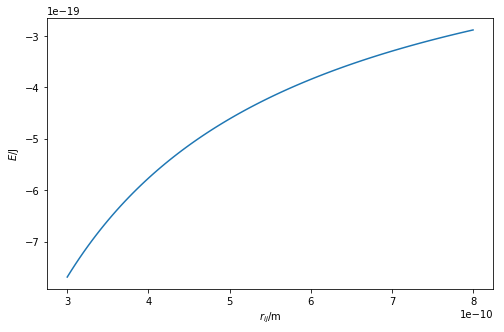

In [2]:
from scipy.constants import e, epsilon_0

def coulomb_energy(qi, qj, rij):
    """
    Calculation of Coulomb's law.
    
    Parameters
    ----------
    qi: float
        Electronic charge on particle i
    qj: float
        Electronic charge on particle j
    rij: float 
        Distance between particles i and j
        
    Returns
    -------
    float
        Energy of the Coulombic interaction
    """
    return (qi * qj * e ** 2) / (4 * np.pi * epsilon_0 * rij)

r = np.linspace(3e-10, 8e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, coulomb_energy(1, -1, r))
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
plt.show()

The above code and plot can be thought of as the interaction between a sodium ion (Na<sup>+</sup>) and a chloride ion (Cl<sup>-</sup>).
These ions have opposite charges and therefore will be very strongly attracted to each other.
This makes for a relatively straightforward example, as it is clear that Coulomb's law is a suitable model for the potential energy of the two oppositely and integer charged point (atomic) objects. 

### The van der Waals interaction

The potential model for the short-range interaction between atoms is less well defined.
It is often referred to as the **van der Waals** interaction, and encompasses both the attractive London dispersion effects and the repulsive Pauli exclusion principle. 
There are a variety of ways that the van der Waals interaction can be modelled. 

One commonly applied method is the **Lennard-Jones** potential model, which considers the attractve London dispersion effects as follows, 

$$ E_{\text{attractive}}(r_{ij}) = \dfrac{-B}{r_{ij}^6},$$ 

where $B$ is a constant for the interaction and $r_{ij}$ is the distance between the two atoms. 
The Pauli exclusion principle is repulsive and only present over very short distances modelled as, 

$$ E_{\text{repulsive}}(r_{ij}) = \dfrac{A}{r_{ij}^{12}},$$

where $A$ is an interaction specific constant.
The Python code below defines each of the components of the Lennard-Jones potential and the total energy of the interaction.
These are then all plotted on a single graph. 
The values of $A$ and $B$ are those associated with an argon-argon interaction, as defined by Rahman [3].

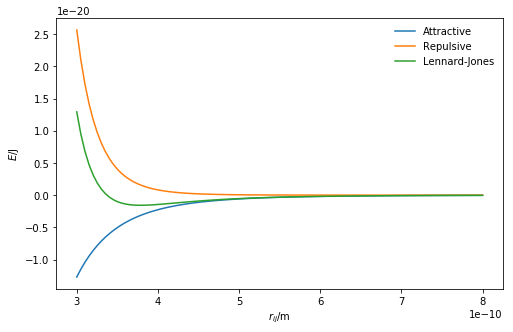

In [3]:
def attractive_energy(rij, b):
    """
    Attractive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    b: float 
        B parameter for interaction between i and j
    
    Returns
    -------
    float
        Energy of attractive component of Lennard-Jones 
        interaction
    """
    return -b / np.power(rij, 6)

def repulsive_energy(rij, a):
    """
    Repulsive component of the Lennard-Jones interaction
    energy.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    
    Returns
    -------
    float
        Energy of repulsive component of Lennard-Jones 
        interaction
    """
    return a / np.power(rij, 12)

def lj_energy(rij, a, b):
    """
    Implementation of the Lennard-Jones potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    b: float 
        B parameter for interaction between i and j
    
    Returns
    -------
    float
        Energy of the interaction between i and j.
    """
    return repulsive_energy(rij, a) + attractive_energy(rij, b)

r = np.linspace(3e-10, 8e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, attractive_energy(r, 9.273e-78), label='Attractive')
ax.plot(r, repulsive_energy(r, 1.363e-134), label='Repulsive')
ax.plot(r, lj_energy(r, 1.363e-134, 9.273e-78), label='Lennard-Jones')
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
ax.legend(frameon=False)
plt.show()

The Lennard-Jones potential is not the only way to model the van der Waals interaction. 
Another commonly applied potential model is the **Buckingham** potential.
Similar to the Lennard-Jones potential, the Buckingham models the attractive term with a sixth power dependency on the distance between the two bonded particles. 
However, instead of a twelfth power repulsion term an exponential function is utilised instead. 
The total Buckingham potential has the following form, 

$$ E_{\text{Buckingham}}(r_{ij}) = A\exp{-Br_{ij}} - \dfrac{C}{r_{ij}^6}, $$

where $A$, $B$, and $C$ are interaction specific parameters that must be determined. 
N.B. these are not the same $A$ and $B$ as in the Lennard-Jones potential. 

The Python code below allows the comparison between these two van der Waals potentials, using defined parameters for an argon-argon interaction [3, 4].

## Information: Potential models

These are just two of many potentials for modelling of the van der Waals interaction. Furthermore, the parameters used in the model are just one example of the many possible parameterisations of the argon-argon interaction. 

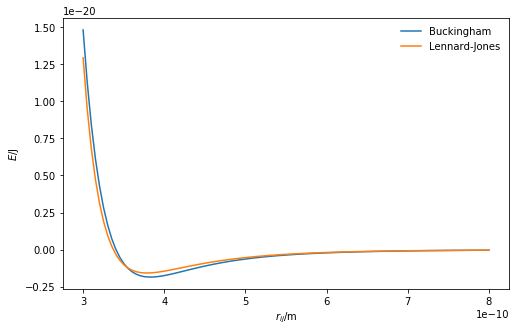

In [4]:
def buckingham_energy(rij, a, b, c):
    """
    Implementation of the Buckingham potential 
    to calculate the energy of the interaction.
    
    Parameters
    ----------
    rij: float
        Distance between particles i and j
    a: float 
        A parameter for interaction between i and j
    b: float 
        B parameter for interaction between i and j
    c: float 
        C parameter for interaction between i and j
    
    Returns
    -------
    float
        Energy of the interaction between i and j.
    """
    return a * np.exp(-b * rij) - c / np.power(rij, 6)

r = np.linspace(3e-10, 8e-10, 100)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111)
ax.plot(r, buckingham_energy(r, 1.69e-15, 3.66e10, 1.02e-77), label='Buckingham')
ax.plot(r, lj_energy(r, 1.363e-134, 9.273e-78), label='Lennard-Jones')
ax.set_xlabel(r'$r_{ij}$/m')
ax.set_ylabel(r'$E$/J')
ax.legend(frameon=False)
plt.show()

There is a small but clear difference between the two potential energy functions; this may be due to the different potential model or due to the [parameterisation](02_episode.ipynb) of that model.

## Key Points
- Classical methods simplify atomistic modelling by treating the potential energy of a system of atoms using mathematical functions
- There are a wide range of different mathematical functions available

# References

1. Coulomb, C. A. (1788). Histoire de l’Académie Royale des Sciences. Imprimerie Royale. 569–577
2. Coulomb, C. A. (1788). Histoire de l’Académie Royale des Sciences. Imprimerie Royale. 578–611
3. Rahman, A. (1964). Phys. Rev., **136**, A405. [DOI: 10.1103/PhysRev.136.A405](https://doi.org/10.1103/PhysRev.136.A405)
4. Buckingham, R. A. (1938). Proc. Royal Soc. Lond. A, **168**, 264-283. [DOI: 10.1098/rspa.1938.0173](https://doi.org/10.1098/rspa.1938.0173) 